<p class='notebook_header'><b>CS 309 - Robot Learning</b></p>
<p class='notebook_header'>Homework 1</p>
<hr class='separate' />

<p class='section_header'><b>Part 1: Linear Algebra</b></p>

Implement the following matrix/vector functions using NumPy operations.

If the function's operation isn't possible for matrix or vector inputs, return None.

In [1]:
import numpy as np

In [2]:
def add(a, b):
    return np.add(a,b);

def subtract(a, b):
    return np.subtract(a, b);

def multiply(a, b):
    if a.shape[1] != b.shape[0]:
        return None
    return np.matmul(a,b);

def divide(a, b):
    return None;

def transpose(a):
    return np.transpose(a);

def two_norm(a):
    return np.linalg.norm(a, 2);

<p>Using your code from above, solve the following equations. If an operation isn't possible, put None or comment with "Not Possible".</p>

$$
u = \begin{bmatrix} 2 \\ 3 \\ 9 \end{bmatrix}, \:
v = \begin{bmatrix} -2 \\ 1 \\ 8 \end{bmatrix}
$$  


In [3]:
u = np.array([
    [2],
    [3],
    [9]
])

v = np.array([
    [-2],
    [1],
    [8]
])

$$ u + v = \begin{bmatrix} 0 \\ 4 \\ 17 \end{bmatrix} $$  

$$ u - v = \begin{bmatrix} 4 \\ 2 \\ 1 \end{bmatrix} $$  

$$ u * v = \text{Not Possible} $$  

$$ u \div v = \text{Not Possible} $$  


In [4]:
# YOUR CODE HERE

u_plus_v = add(u,v)

u_minus_v = subtract(u,v)

u_mult_v = multiply(u,v) # not possible, dimensions of u and v are both (3,1) so multiplication can't happen

u_div_v = divide(u,v) # this returns None anyways, not possible since dividing matrices isn't allowed

$$ u^{\;T} * v = \begin{bmatrix} 71 \end{bmatrix} $$  

$$ u * v^{\;T} = \begin{bmatrix} -4 & 2 & 16 \\ -6 & 3 & 24 \\ -18 & 9 & 72 \end{bmatrix} $$  

$$ u^{\;T} * u = \begin{bmatrix} 94 \end{bmatrix} $$  

$$ \left \| u \right \|_{2}^{2} = 94.0 $$  


In [5]:
# YOUR CODE HERE

u_transpose_v = multiply(transpose(u), v)
print(u_transpose_v)

u_v_tranpose = multiply(u, transpose(v))
print(u_v_tranpose)

u_tranpose_u = multiply(transpose(u), u)
print(u_tranpose_u)

two_norm_u = two_norm(u) ** 2
print(two_norm_u)

[[71]]
[[ -4   2  16]
 [ -6   3  24]
 [-18   9  72]]
[[94]]
94.00000000000001


<hr class='light-separate' />

$$
A = \begin{bmatrix} 1 & 6 & 5\\ 0 & -4 & -1\\ 7 & 2 & 3 \end{bmatrix}, \: 
B = \begin{bmatrix} 3 & 1 & 1\\ 4 & -1 & 7\\ 7 & 0 & 0 \end{bmatrix}
$$  


$$ A + B = \begin{bmatrix} 4 & 7 & 6 \\ 4 & -5 & 6 \\ 14 & 2 & 3 \end{bmatrix} $$  

$$ A - B = \begin{bmatrix} -2 & 5 & 4 \\ -4 & -3 & -8 \\ 0 & 2 & 3 \end{bmatrix} $$  

$$ A * B = \begin{bmatrix} 62 & -5 & 43 \\ -23 & 4 & -28 \\ 50 & 5 & 21 \end{bmatrix} $$  

$$ A \div B = \text{Not Possible} $$  


In [6]:
# YOUR CODE HERE

a = np.array([
    [1, 6, 5],
    [0, -4, -1],
    [7, 2, 3]
])

b = np.array([
    [3, 1, 1],
    [4, -1, 7],
    [7, 0, 0]
])

a_plus_b = add(a,b)
print(a_plus_b)

a_minus_b = subtract(a,b)
print(a_minus_b)

a_mult_b = multiply(a,b)
print(a_mult_b)

a_div_b = divide(a,b)
print(a_div_b)

[[ 4  7  6]
 [ 4 -5  6]
 [14  2  3]]
[[-2  5  4]
 [-4 -3 -8]
 [ 0  2  3]]
[[ 62  -5  43]
 [-23   4 -28]
 [ 50   5  21]]
None


<hr class='light-separate' />

$$
C = \begin{bmatrix} 5 & 1 \\ -1 & 7 \\ 3 & 0 \end{bmatrix}
$$  


In [7]:
c = np.array([[5, 1],
              [-1, 7],
              [3, 0]])

Right Pseudo Inverse of C:
> $$
\begin{align}
    &= C^T(C C^T)^{-1}\\
    &=
    \begin{bmatrix}
    0.3125 & -0.0078125 & 0.25 \\
    0.05859375 & 0.14208984 & 0.0390625
    \end{bmatrix}
\end{align}
$$  

Left Pseudo Inverse of C:
>$$
\begin{align}
&= (C^T C)^{-1} C^T \\
&=
\begin{bmatrix}
0.1443299 & -0.02061856 & 0.08591065 \\
0.0257732 & 0.13917526 & 0.00343643
\end{bmatrix}
\end{align}
$$  


In [8]:
# YOUR CODE HERE
right_pinv = multiply(transpose(c), np.linalg.inv(multiply(c, transpose(c))))
print(right_pinv)

left_pinv = multiply(np.linalg.inv(multiply(transpose(c), c)), transpose(c))
print(left_pinv)

[[ 0.3125     -0.0078125   0.25      ]
 [ 0.05859375  0.14208984  0.0390625 ]]
[[ 0.1443299  -0.02061856  0.08591065]
 [ 0.0257732   0.13917526  0.00343643]]


<hr class='separate' />

<p class='section_header'><b>Part 2: Regression</b></p>

**Write** the equation for Ordinary Least Squares below. 

> $$
\hat{\Theta} = ((X^T \ X)^{-1} \ X^T) \ Y \\
$$

**Explain** Ordinary Least Squares in terms of what it optimizes.

> Ordinary Least Squares (OLS) tries to find the line of best fit (in any dimension) in a given dataset. It does this by trying to minimize the distance between the predicted value in the line of best fit and the actual, given value, for each point in the dataset, also called the residuals. The goal is to find a $\hat{\Theta}$ representing the optimum slopes and intercepts for the function to represent the line of best fit. Here, $\hat{\Theta}$ will represent the optimum line of best fit and $\underline{\Theta}$ will represent an imperfect line of best fit.

> In mathematical terms, the for every data point $i$, the predicted value is $x_i^T \underline{\Theta}$ and the ground truth value is $y_i$. To this minimization goal, a few modifications are added. The goal is squared to ensure that the magnitude of the error is being minimized. It is multiplied by $\frac{1}{N}$ to aid in the math when finding the optimal $\hat{\Theta}$.

> Then, summing the minimization goal over all datapoints and creating a function $argmin(\underline{\Theta})$ to accept the argument $\underline{\Theta}$ and return the optimum $\hat{\Theta}$ that minimizes the optimization goal, we have:

$$\hat{\Theta} = argmin(\underline{\Theta})\Bigg{(} \ \frac{1}{N} \ \sum_{i}^{N} [X_i^T \underline{\Theta} - Y_i]^2\Bigg{)}$$

> After doing some calculus, this simplifies to:
$$
\hat{\Theta} = ((X^T \ X)^{-1} \ X^T) \ Y \\
$$



In [9]:
# Don't change this cell!
# Load in the data about the study on students
train = np.loadtxt('train.csv', delimiter=',')
x_0, x_1, x_2, y = train.T
X_train = np.array([x_0, x_1, x_2]).T
Y_train = np.expand_dims(y, 1)

test = np.loadtxt('test.csv', delimiter=',')
x_0, x_1, x_2, y = test.T
X_test = np.array([x_0, x_1, x_2]).T
Y_test = np.expand_dims(y, 1)

There was an imaginary study done on 101 students at Crest University. The study surveyed students for the amount they have spent on electronics, books, pencils, and foods. 

Given that the **amount students spend on electronics ($Y$)** is linearly related to the **amount they spend on books ($ X_{0} $), pencils ($ X_{1}$)**, and **food ($ X_{2}$)**, 
**implement** the Ordinary Least Squares method to model this regression problem.

The data is read in from the previous cell code. **X_train** has the input features, while **Y_train** has corresponding target outputs.

After finding a solution, try to measure the error between your predictions and the ground truth. 

In [10]:
# TODO: Create code for OLS here. DO NOT use any other libraries in your first implementation.
# TODO: Plot your regression line over the input points.

def OLS(X, y):
    pseudo_inv = multiply(np.linalg.inv(multiply(X.T, X)), X.T)
    theta = multiply(pseudo_inv, y)
    return theta

# multiply X and theta to get the prediction
def get_prediction(X, theta):
    assert(X.shape[1] == theta.shape[0])
    return multiply(X, theta)

# this is the OLS minimization objective as shown above,
# (1/n) * sum(...)
def get_OLS_error(prediction, ground_truth):
    assert(prediction.shape == ground_truth.shape)
    
    n = prediction.shape[0]
    differences = (prediction - ground_truth).flatten() ** 2
    return np.sum(differences) / n

# perform the regression on the training data
theta = OLS(X_train,Y_train)
# print(theta)
prediction = get_prediction(X_train, theta)
error = get_OLS_error(prediction, Y_train)
print("Error for training set: ", error)

# perform the regression on the testing data
theta = OLS(X_test, Y_test)
# print(theta)
prediction = get_prediction(X_test, theta)
error = get_OLS_error(prediction, Y_test)
print("Error for testing set: ", error)


# Both errors are pretty large, which shows us that OLS does not
# perform well on this dataset

Error for training set:  3532.974816901931
Error for testing set:  18157.1846126346


**Explain** what collinearity is.

> Collinearity is when some of the features in the training set are dependent. This mathematically means that one feature could be represented as a multiple of the other. What this means in the scope of OLS is that there could be a line of solutions rather than a single solution, which defeats the point of regression since a single solution is wanted.

**Write** the equation for Ridge Regression below. 

> Using $\Phi$ as the feature matrix of $X$, we have:
> $$\hat{\Theta} = (\Phi^T\Phi + \lambda \ \text{I})^{-1} \Phi^Ty$$

**Explain** what the purpose ridge regression and its advantages and disadvantages over OLS.

> Ridge regression is meant to combat the problem of having dependent features produce a line of solutions rather than a single solution. The way it does this is by adding a regulator term in the minimization objective:

> Ridge regression minimization objective: $\hat{\Theta} = argmin(\underline{\Theta}) \frac{1}{2} \Big{(} || y - \Phi \underline{\Theta}||_2^2 + \lambda ||\underline{\Theta}||_2^2\Big{)} $

> Where the $\lambda ||\underline{\Theta}||_2^2$ is the regularization term. The $\lambda$ is a hyperparameter. Using calculus similar to the math used to derive OLS, we arrive at the equationa above for the optimal $\hat{\Theta}$.


> The advantages of ridge regression over OLS are that since a regularization factor is added to the minimization objective, a single solution is guaranteed. This means that the single, optimal solution was reached rather than one of the many, possibly infinite solutions, that would've seemed like the optimal solution in OLS. Additionally, using ridge regression allows you to examine the data in terms of features rather than the specific numeric values which may provide further insight on the data.

> The disadvantages of ridge regression is that there is a hyperparameter to tune, $\lambda$, but since there is only one parameter, it is not too much of a disadvantage. Other than this, there is not really much disadvantage; ridge regression is mostly a step up from OLS.

**Implement** your regression model with ridge regression below.

In [11]:
# TODO: Create code for Ridge Regression here. DO NOT use any other libraries
# TODO: Plot your regression line over the input points.

# analytical solution to RR
def RR(X, y, ridge=0.001):
    phi_t_phi = multiply(X.T, X)
    regularizer = ridge * np.identity(phi_t_phi.shape[0])
    phi_t_y = multiply(X.T, y)
    inverse_part = np.linalg.inv(add(phi_t_phi, regularizer))
    theta = multiply(inverse_part, phi_t_y)
    return theta

# minimization objective of RR as shown above
def get_RR_error(prediction, theta, ground_truth, ridge):
    assert(prediction.shape == ground_truth.shape)
    
    n = prediction.shape[0]
    differences = two_norm((ground_truth - prediction).flatten()) ** 2
    regularizer = two_norm(theta.flatten()) ** 2
    return (differences + regularizer) / 2
    

# using the get_prediction and get_error functions from above:

# check against training data
for ridge in [0.3, 0.1, 0.01, 0.03, 0.001, 0.003]:
    print(f"ridge={ridge}")
    theta = RR(X_train,Y_train, ridge)
#     print(theta)
    pred = get_prediction(X_train, theta)
    error = get_RR_error(pred, theta, Y_train, ridge)
    print("Error for training set: ", error)

    # test your model on testing data
    theta = RR(X_test, Y_test, ridge)
    pred = get_prediction(X_test, theta)
    error = get_RR_error(pred, theta, Y_test, ridge)
    print("Error for testing set: ", error)
    print()


# We can see that the errors here are much smaller than the
# error for OLS. additionally, the errors are constant between
# the training and testing sets, as well as between different
# ridge values, which hint at a more consistent
# model less prone to overfitting.

ridge=0.3
Error for training set:  1141.503832815676
Error for testing set:  1177.0187352657965

ridge=0.1
Error for training set:  1141.5038390476188
Error for testing set:  1177.0187479999522

ridge=0.01
Error for training set:  1141.5038457631474
Error for testing set:  1177.019314104384

ridge=0.03
Error for training set:  1141.5038418034155
Error for testing set:  1177.0188078334304

ridge=0.001
Error for training set:  1141.5046272568266
Error for testing set:  1177.0762787791

ridge=0.003
Error for training set:  1141.5039389728722
Error for testing set:  1177.0250908037758



**Explain** the differences ridge regression created for theta compared to OLS, and why these differences even existed. Also try different values for the ridge parameters and describe how they effect your results.

> By using `print(theta)` (print statements commented out above), it seems that the `theta` created by the OLS method had weights that were sometimes huge, in the thousands and ten thousands, whereas Ridge Regression produced theta values which always had components which were very small, mostly under 5. Because of the advantage RR gives over OLS, the first thought that comes to mind is that the differences might have been created by collinear features. Indeed, in the dataset, the amount of money students spend on books and pencils may be correlated, leading to RR having a much lower average error. The reason that Ridge had smaller weights overall was probably because, using the regularization term against the `argmin` function, it punishes for large weights, so it desires a smaller $\hat{\Theta}$.

> There are differences over each ridge value but since they are so minimal, possibly due to the relative closeness of the chosen ridge values, the errors don't change too much. If the ridge values are set at something like 3000 however, the ridge values alter.

There are other regularizers other than ridge regression, such as LASSO. **Explain** the differences between LASSO and Ridge Regression and how it changes the solution mathematically.

> LASSO regression adds the regularizer term $|\underline{\Theta}|$ instead of adding the regularizer term $||\underline{\Theta}||_2^2$ (punishes for the absolute value only instead of the sum of squares). This allows some coefficients to be 0 which means that some features may be taken out of the picture all together, resulting in a simpler model of the problem. Both Ridge and LASSO regression can be used to tackle the problem of collinear factors though.

In [12]:
# TODO: Create code for LASSO here
# TODO: Plot your regression line over the input points. 

# Use sklearn.linear_model for the LASSO and Elastic Net implementations
# !pip install sklearn
import sklearn
from sklearn import linear_model

def LASSO(X, y, alpha=.001):
    classifier = linear_model.Lasso(alpha)
    classifier.fit(X, y)
    return classifier.coef_

# minimization objective of Lasso as shown above
def get_Lasso_error(prediction, theta, ground_truth):    
    n = prediction.shape[0]
    differences = two_norm((ground_truth - prediction)) ** 2
    regularizer = np.sum(np.abs(theta))
    return (differences + regularizer) / 2

# TODO: check against training data
for alpha in [0.3, 0.1, 0.01, 0.03, 0.001, 0.003]:
    print(f"alpha={alpha}")
    theta = LASSO(X_train, Y_train, alpha)
    print(theta)
    prediction = get_prediction(X_train, theta)
    error = get_Lasso_error(prediction, theta, Y_train.flatten())
    print("Error for training set: ", error)


    # TODO: check against testing data
    theta = LASSO(X_test, Y_test, alpha)
    print(theta)
    prediction = get_prediction(X_test, theta)
    error = get_Lasso_error(prediction, theta, Y_test.flatten())
    print("Error for testing set: ", error)
    print()
    # print(theta)

alpha=0.3
[ 2.99055607  2.01740188 -0.00363305]
Error for training set:  3599.4252615626174
[2.99269029e+00 1.99687990e+00 2.28805633e-03]
Error for testing set:  1952.750975291754

alpha=0.1
[ 2.99085162  2.01755857 -0.00366872]
Error for training set:  3593.782307860037
[2.99302044e+00 1.99709802e+00 2.24353785e-03]
Error for testing set:  1949.116657317834

alpha=0.01
[ 2.99098462  2.01762907 -0.00368477]
Error for training set:  3591.246399906312
[2.99316901e+00 1.99719617e+00 2.22350453e-03]
Error for testing set:  1947.4853188915677

alpha=0.03
[ 2.99095507  2.01761341 -0.00368121]
Error for training set:  3591.8097514938345
[2.99313600e+00 1.99717436e+00 2.22795638e-03]
Error for testing set:  1947.8476183684038

alpha=0.001
[ 2.99099792  2.01763613 -0.00368638]
Error for training set:  3590.99292590406
[2.99318387e+00 1.99720599e+00 2.22150120e-03]
Error for testing set:  1947.3223251735978

alpha=0.003
[ 2.99099497  2.01763456 -0.00368602]
Error for training set:  3591.0492516

**Explain** the effect elastic nets had on your values for theta compared to OLS. Also try different values for the ridge parameters and describe how they effect your results.

> We can see that LASSO is somewhat of a middle ground between OLS and Ridge regression in terms of the errors seen and the thetas. The `theta` produced by OLS was large and non-optimal, while the theta produced by LASSO were smaller. The thetas produced by LASSO weren't as small as prodced by Ridge regression though which makes sense, as Ridge regression punishes the extreme values more. The error produced by LASSO is also midway between the errors produced by OLS and Ridge: The errors produced by OLS were above 3500 and were not consistent. In LASSO, the errors are lower, looking to average at error 2500. Of course, ridge regression went further rand minimized the error to only around 1200.

> Changing the alpha hyperparameter seem to alter the error a little more than the ridge regression: small changes between small numbers make the change in errors more noticeable.

**Explain** the differences between LASSO, Ridge Regression and Elastic Nets and how it changes the solution mathematically.

> * LASSO regression adds a single regularization term, the 1 norm of `theta`.
> * Ridge regression adds a single regularization term, the 2 norm of `theta`.
> * Elastic Nets add two regularization terms, both the 1 norm of `theta` and the 2 norm of `theta`.

> Both Elastic Nets are a sort of middle ground betwen LASSO and Ridge regression, and tries to acommodate both punishment terms. Mathematically, the differences between the addition of the term(s) in `argmin` determines what in the weights are prioritized. Since LASSO and Elastic Nets both use the 1 norm regularization term, they both tend to get higher weights down towards 0. Ridge regression doesn't specifically drive weights towards 0 but just penalizes huge weights and tries to get high weights to low weights.

In [13]:
# TODO: Create code for Elastic Nets here. You can use a library such as scipy
# TODO: Plot your regression line over the input points.

from sklearn.linear_model import ElasticNet
def EN(X,y):
    classifier = linear_model.ElasticNet(random_state=0, max_iter=10000)
    classifier.fit(X, y)
    return classifier.coef_

# TODO: check against training data
theta = EN(X_train, Y_train)
prediction = get_prediction(X_train, theta)
print("Absolute value differences in the training set: ")
print(np.abs(prediction - Y_train))
# print(theta)

# TODO: check against testing data
theta = EN(X_test, Y_test)
prediction = get_prediction(X_test, theta)
print("\nAbsolute value differences in the testing set: ")
print(np.abs(prediction - Y_test))
# print(theta)


# From this, it seems like Elastic Net truly does try to compensate
# between LASSO and ridge. The thetas observed have 0's, like LASSO
# prefers, and the errors between the predicted and ground truth values
# are low, but not as low as ridge regression.

Absolute value differences in the training set: 
[[ 11.21043291 270.27386981 463.57216973 ... 381.94779179 276.02206778
   50.29429705]
 [256.64783629   2.41560061 195.71390053 ... 114.08952259   8.16379858
  217.56397215]
 [451.44614149 192.38270459   0.91559533 ...  80.70878261 186.63450662
  412.36227735]
 ...
 [368.85580749 109.79237059  83.50592933 ...   1.88155139 104.04417262
  329.77194335]
 [260.35610179   1.29266489 192.00563503 ... 110.38125709   4.45553308
  221.27223765]
 [ 27.61952709 231.44390981 424.74220973 ... 343.11783179 237.19210778
   11.46433705]]

Absolute value differences in the testing set: 
[[ 5.71715791 10.94636928 32.34176782 ... 54.54751277 60.53638314
  17.26011007]
 [19.05229691  2.38876972 19.00662882 ... 67.88265177 73.87152214
   3.92497107]
 [41.05823891 24.39471172  2.99931318 ... 89.88859377 95.87746414
  18.08097093]
 ...
 [47.42757409 64.09110128 85.48649982 ...  1.40278077  7.39165114
  70.40484207]
 [47.98624109 64.64976828 86.04516682 ...  0.


What is the purpose of a regularizer?

> To reduce overfitting the model against the training set too much, and to reduce the effect that dependent features in the incoming data have on the prediction.

Give two examples where a regularizer would give more robust models.

> A regularizer would give more robust models if a prediction is desired but the input data has collinear features. Here are two examples where this is the case:
> 1. The number of colleges a students is admitted to based on factors like SAT score, scores in school, and number of extracurricular activities. Clearly a student with a higher number of one of those numbers would be likely to have a higher number of another factor: a student who scores higher on the SAT is probably more likely to have higher grades in school.
> 2. Predicting the temperature of the weather based on factors like recent wind speed, precipitation levels, and the current season. Wind speed and precipitation levels are not independent: if there was a storm recently, there might have been high wind speed and high precipitation levels. Additionally, these two are not independent of the current season, since seasons like summer may have very low levels of wind speed and precipitation levels.

Explain with reference to the dataset why a regularizer achieved better performance than OLS.

> Here specifically, the factors $X_0, X_1,$ and $X_2$ were probably dependent. $X_0$ and $X_1$ can clearly be seen as dependent, since a student who spends more on books is more likely to spend money on pencils. Additionally, all 3 may be dependent as a whole: a student with more money in general may be more likely to spend money on books, pencils, and food, than someone without much money at all. Therefore, adding a regularizer to reduce the effect that dependent features have on the prediction increased the performance of the models astronomically, as has been shown.

<hr class='light-separate' />

Implement feature transformation to fit a line to the curve generated from the .csv file.

In [14]:
X = np.genfromtxt('feature_transform.csv', delimiter=',')
y = X[:,2].reshape(500, 1)
X = X[:,:2]

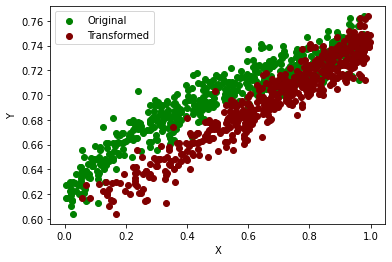

In [15]:
phi = lambda x: np.sqrt(X)
transformed = phi(X)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],y,color=(0.0,0.5,0.0), label='Original')
plt.scatter(transformed[:,0],y,color=(0.5,0.0,0.0), label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# We can see that the transformed function sqrt(x) -> y (in red) has a more
# linear shape than the original function x -> y (in green).

<hr class='light-separate' />

Recall what you learned about polynomial regression and explain what is happening to the model as you increase the degrees. Run the cell below and use the slider to help you.

> I interacted with the tool by changing the `min` and `value` parameters in the last line of the next block, in the `interact()` function. As the degree of the function increased, the line of best fit became more and more attuned to the specific curves of the dataset, and started to fit to the given dataset very very closely. This is happening because of a phenomena called overfit: by increasing the degree of the function which is used to fit the curve, the function has more legroom to morph itself to the specific attributes of the data given to it. This can easily be seen: in a simple quadratic graph, there is only room to 'curve' once, while in a cubic graph, there is now room to 'curve' twice, etc. 

> Because this happens, the regression model becomes more satisfied that it's able to match the specificities of the training set, so it reports a high success rate. The problem is though that it is now at such a high degree that the model cannot be used for other datasets that may be distributed differently. In sort, the curve has become too focused on the training dataset and cannot morph itself back to become more general. This is called overfit.

> Therefore, a model which works somewhat ok on this particular dataset at, say 5 or 6 degrees, may be tempted to keep increasing the degrees to find a curve which fits to the dataset even better. However, it may be the case that the model with 5 or 6 degrees is more applicable to more general datasets, and the model with higher degrees immediately fails on other datasets.

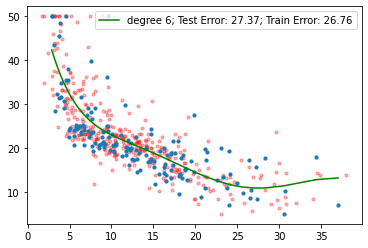

<function __main__.f(degree)>

In [16]:
# DO NOT ALTER

# !pip install pandas
# !pip install ipywidgets
# !pip install sklearn
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

boston = datasets.load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)

X = data[['LSTAT']].values
y = data['MEDV']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, shuffle=True)

temp = pd.DataFrame({'x':x_train.reshape(1, 354)[0], 'y':y_train})
temp = temp.sort_values('x')
x_train = temp['x'].values.reshape(354,1)
y_train = temp['y'].values

temp = pd.DataFrame({'x':x_test.reshape(1, 152)[0], 'y':y_test})
temp = temp.sort_values('x')
x_test = temp['x'].values.reshape(152,1)
y_test = temp['y'].values

def f(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    y_plot = model.predict(x_test)
    
    plt.scatter(x_train, y_train, s=10, color='red', alpha=.3)
    plt.scatter(x_test, y_test, s=10)

    test_sr = (y_test - y_plot)**2
    test_ssr = test_sr.sum()
    test_asr = test_ssr/len(test_sr)
    
    y_plot_train = model.predict(x_train)
    train_sr = (y_train - y_plot_train)**2
    train_ssr = train_sr.sum()
    train_asr = train_ssr/len(train_sr)
    
    plt.plot(x_test, y_plot, label="degree %d" % degree + '; Test Error: %.2f' % test_asr + '; Train Error: %.2f' % train_asr, color='green')
    plt.legend(loc='upper right')
    plt.show()
    
interact(f, degree = widgets.IntSlider(min=1, max=20, step=1, value=6))